In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Web Developer Workflow with Vertex AI Extensions

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/applied-ai-engineering-samples/blob/main/genai-on-vertex-ai/vertex_ai_extensions/notebooks/web_developer_workflow_vertexai_extensions.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_extensions%2Fnotebooks%2Fweb_developer_workflow_vertexai_extensions.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/applied-ai-engineering-samples/main/genai-on-vertex-ai/vertex_ai_extensions/notebooks/web_developer_workflow_vertexai_extensions.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/applied-ai-engineering-samples/tree/main/genai-on-vertex-ai/vertex_ai_extensions/notebooks/web_developer_workflow_vertexai_extensions.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

| | |
|----------|-------------|
| Author(s)   | [Lei Pan](https://github.com/genaimagician)|
| Reviewers(s) | [Meltem Subasioglu](https://github.com/5Y5TEM), Michael W. Sherman|
| Last updated | 2024-04-30: Review and Cleanup |
| | 2024-04-25: Initial Publication |

## Overview

In this notebook, you will learn how to use the Vertex AI Extensions Code Interpreter Extension to build and deploy a static web application by following these steps:

- Generate PRD using Gemini API
- Registering the pre-built Code Interpreter extension in your project
- Using Code Interpreter to build up the website according to the PRD
- Using GCS API to deploy the website

▶ If you're already familiar with Google Cloud and the Vertex Extensions Code Interpreter Extension, you can skip reading between here and the "**Getting Started**" section.

### Vertex AI Extensions

[Vertex AI Extensions](https://cloud.google.com/vertex-ai/generative-ai/docs/extensions/overview) is a platform for creating and managing extensions that connect large language models to external systems via APIs. These external systems can provide LLMs with real-time data and perform data processing actions on their behalf. You can use pre-built or third-party extensions in Vertex AI Extensions.

### Vertex AI Extensions Code Interpreter Extension

The [Code Interpreter](https://console.cloud.google.com/vertex-ai/generative-ai/docs/extensions/google-extensions.md#google_code_interpreter_extension) extension provides access to a Python interpreter with a sandboxed, secure execution environment. It lets you generate and execute Python code to:

* Analyze, clean, transform, and reshape your datasets
* Visualize data in charts and graphs
* Execute calculations

### Using this Notebook

Colab is recommended for running this notebook, but it can run in any iPython environment where you can connect to Google Cloud, install pip packages, etc.

If you're running outside of Colab, depending on your environment you may need to install pip packages that are included in the Colab environment by default but are not part of the Python Standard Library. Outside of Colab you'll also notice comments in code cells that look like #@something, these trigger special Colab functionality but don't change the behavior of the notebook.


This tutorial uses the following Google Cloud services and resources:

* Vertex AI Extensions
* Google Cloud Storage Client
  - If you don't have a bucket, you can follow [this doc](https://cloud.google.com/storage/docs/creating-buckets) to create one or follow the code provided in this notebook later.

This notebook has been tested in the following environment:

* Python version = 3.10.12
* [google-cloud-aiplatform](https://pypi.org/project/google-cloud-aiplatform/) version = 1.4.7

### Useful Tips

1. This notebook uses Generative AI cababilities. Re-running a cell that uses Generative AI capabilities may produce similar but not identical results.
2. Because of #1, it is possible that an output from Code Interpreter producess errors. If that happens re-run the cell that produced the coding error. The different generated code will likely be bug free. The `run_code_interpreter` method below helps automate this.
3. The use of Extensions and other Generative AI capabilities is subject to service quotas. Running the notebook using "Run All" may exceed  your Queries per minute (QPM) limitations. Run the notebook manually and if you get a quota error pause for up to 1 minute before retrying that cell. Code Interpreter uses Gemini on the backend and is subject to the Gemini quotas, [view your Gemini quotas here](https://console.cloud.google.com/iam-admin/quotas?pageState=(%22allQuotasTable%22:(%22f%22:%22%255B%257B_22k_22_3A_22_22_2C_22t_22_3A10_2C_22v_22_3A_22_5C_22base_model_5C_22_22%257D_2C%257B_22k_22_3A_22_22_2C_22t_22_3A10_2C_22v_22_3A_22_5C_22gemini_5C_22_22%257D%255D%22%29%29&e=13802955&mods=logs_tg_staging).
4. The Code Interpreter Extension is stateless and therefore every request to Code Interpreter does not have knowledge of previous operations nor files injested or produced in previous steps. Therefore, with any request to Code Interpreter you need to submit all files and instructions for that request to complete successfully.


## Getting Started

The following steps are necessary to run this notebook, no matter what notebook environment you're using.

If you're entirely new to Google Cloud, [get started here](https://cloud.google.com/docs/get-started).

### Google Cloud Project Setup

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs.
1. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project).
1. [Enable the Service Usage API](https://console.cloud.google.com/apis/library/serviceusage.googleapis.com)
1. [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).
1. [Enable the Cloud Storage API](https://console.cloud.google.com/flows/enableapi?apiid=storage.googleapis.com).

### Google Cloud Permissions

**To run the complete Notebook, including the optional section, you will need to have the [Owner role](https://cloud.google.com/iam/docs/understanding-roles) for your project.**

If you want to skip the optional section, you need at least the following [roles](https://cloud.google.com/iam/docs/granting-changing-revoking-access):
* **`roles/aiplatform.user`** to use Vertex AI components
* **`roles/storage.objectAdmin`** to modify and delete GCS buckets

### Install Vertex AI SDK and other required packages


In [ ]:
!pip install google-cloud-aiplatform --upgrade
# Note -- this may not work in some non-Colab environments. If you get errors
# when running 'import vertexai' below, you'll need to find another way to
# install the latest google-cloud-aiplatform package into your notebook kernel.
# In some kernel setups running "%pip install google-cloud-aiplatform --upgrade"
# in a code cell works if "!pip install ...." doesn't.

## If you're running outside of colab, make sure to install the following modules as well:
!pip install Pillow

### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

You may see the restart reported as a crash, but it is working as-intended -- you are merely restarting the runtime.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment

If you are running this notebook on Google Colab, run the cell below to authenticate your environment.

In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project information and initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

Make sure to change `PROJECT_ID` in the next cell. You can leave the values for `REGION` and `API_ENV` unless you have a specific reason to change them.

In [ ]:
import vertexai

PROJECT_ID = "your project ID"  # @param {type:"string"}
REGION = "us-central1"  # @param {type: "string"}
API_ENV = "aiplatform.googleapis.com"  # @param {type:"string"}

vertexai.init(
    project=PROJECT_ID,
    location=REGION,
    api_endpoint=f"{REGION}-{API_ENV}",
)

## Using Extensions to Build and Deploy a Static Web Application Tutorial

### Import libraries

In [ ]:
import base64
from google.cloud import storage
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Struct
import io
from IPython.display import display
from IPython.display import Markdown
import json
from PIL import Image
import pprint
import textwrap
from vertexai.generative_models import GenerativeModel
from vertexai.preview import extensions

### Step 1: Generate a PRD using Gemini API

In step 1, we use Gemini to generate a PRD. We will use the PRD to generate the web app in step 3.

In [ ]:
vertexai.init(project=PROJECT_ID, location=REGION)
model = GenerativeModel(model_name="gemini-1.0-pro")

response = model.generate_content("""Write a simple website log-in page product
requirement document with 2 features including 1) use html, css, and javascript
to make a login page. The login button should be red. Javascript should validate
login username as "test_login_user", password as "test1234". 2) deploy this html,
css, javascript file to GCS bucket as a static web hosting.""")

In [ ]:
def to_markdown(text):
  """Converts the given text to a Markdown-formatted blockquote.

  This function replaces all bullet points ('•') with markdown list markers ('  *')
  and indents each line with a '>' character to create a blockquote.

  Args:
    text: The text to be converted to Markdown.

  Returns:
    A Markdown object representing the converted text as a blockquote.
  """
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
to_markdown(response.text)

> ## Product Requirement Document: Simple Website Login Page
> 
> ### 1. Introduction
> 
> This document outlines the requirements for a simple website login page. The login page will be built using HTML, CSS, and Javascript and deployed to a GCS bucket as a static web hosting solution.
> 
> ### 2. Features
> 
> **2.1 Login Form:**
> 
> * The login page will feature a form with two input fields:
>     * Username
>     * Password
> * The login button will be red.
> * Javascript will validate the entered username and password.
> * Valid credentials:
>     * Username: "test_login_user"
>     * Password: "test1234"
> 
> **2.2 Validation:**
> 
> * Javascript will handle the validation logic on the client-side.
> * If the username or password is invalid, an error message will be displayed.
> * On successful login, a success message will be displayed.
> 
> ### 3. Technical Requirements
> 
> **3.1 Development Tools:**
> 
> * HTML
> * CSS
> * Javascript
> 
> **3.2 Hosting:**
> 
> * GCS Bucket (configured for static website hosting)
> 
> ### 4. User Interface
> 
> **4.1 Design:**
> 
> * The login page will have a clean and simple design.
> * The layout will be responsive and optimized for different screen sizes.
> 
> **4.2 Language:**
> 
> * English
> 
> ### 5. Success Criteria
> 
> * The login page successfully validates user credentials.
> * Valid credentials redirect the user to the intended destination (e.g., dashboard).
> * Invalid credentials display an appropriate error message.
> * The page is responsive and functions correctly on different devices.
> 
> ### 6. Non-Functional Requirements
> 
> **6.1 Performance:**
> 
> * The login page should load quickly and perform well on different network speeds.
> 
> **6.2 Security:**
> 
> * User credentials should be securely transmitted to the server using HTTPS.
> 
> ### 7. Open Issues
> 
> * None
> 
> ### 8. Dependencies
> 
> * GCS bucket with static website hosting enabled
> 
> ### 9. Assumptions
> 
> * Users have a basic understanding of web browsing.
> 
> ### 10. Approvals
> 
> * This document requires approval from the development team and project manager.
> 
> ## Additional Notes
> 
> * This document serves as a high-level overview of the product requirements. More detailed design specifications and implementation details will be defined in separate documents.
> * User interface mocks and detailed API documentation will be developed in subsequent phases.
> 
> Please let me know if you have any questions or require further information.

### Step 2: Create a Code Interpreter Extension

Now you can create the extension itself. The following cell uses the Python SDK to import the extension (thereby creating it) in Vertex AI Extensions.

In [ ]:
extension_code_interpreter = extensions.Extension.from_hub("code_interpreter")
extension_code_interpreter

### Step 3: Use Code Interpreter to Build the Web App

We use only a portion of the mini PRD when generating the web application because we want to focus solely on the generation of a runnable index.html file.

The complete mini PRD encompasses specifications for both web development (such as the index.html) and deployment instructions. Since our immediate goal was to obtain a functional index.html file without any manual modifications, we opted to exclude the deployment details.

Including the entire PRD would have resulted in the model attaching deployment instructions as plain text to the generated index.html. These instructions, while informative, wouldn't be directly executable and would require separate handling.


In [ ]:
prompt = """
You are asked to generate an index.html page for the feature below:

<feature>
Log-In Page Interface:
Use HTML, CSS, and JavaScript to create a log-in page.
The log-in form should include fields for username and password.
The login button should be red.
Implement JavaScript validation to ensure that the username is "test_login_user" and the password is "test1234".
</feature>

Generate the index.html file now.
"""

response = extension_code_interpreter.execute(
    operation_id = "generate_and_execute",
    operation_params = {"query": prompt},
)

pprint.pprint(response)

The next cell parses response from the extension and saves the index.html generated by Code Interpreter to the working directory.

In [ ]:
# Helper function to parse Code Interpreter output.
def parse_output_files(outputFiles):
    """Parses and displays the contents of output files generated by a process.

    This function iterates through a list of output files, decodes their contents
    from base64, and prints the file name and contents to the console.
    The output is sorted so that image files are displayed first.

    Args:
      outputFiles: A list of dictionaries, where each dictionary represents
                  an output file and contains the following keys:
        - "name": The name of the file.
        - "contents": The base64-encoded contents of the file.

    Returns:
      The decoded contents of the last file processed as a string.
    """
    IMAGE_FILE_EXTENSIONS = set(["jpg", "jpeg", "png"])
    # Sort the output_files so images are displayed before other files such as JSON.
    for output_file in sorted(
        outputFiles,
        key=lambda x: x["name"].split(".")[-1] not in IMAGE_FILE_EXTENSIONS,
    ):
        file_name = output_file.get("name")
        file_contents = base64.b64decode(output_file.get("contents"))
        print("Output Files: \n=======================\n")
        print(f"File Name: {file_name}\n")

        if file_name.endswith(".html"):
          pprint.pprint(file_contents.decode(), compact=False, width=160)
        else:
          print(f"File Contents: {file_contents.decode()}\n")
    return file_contents.decode()

In [ ]:
index_page = parse_output_files(response["output_files"])

Output Files: 

File Name: index.html

('\n'
 '<!DOCTYPE html>\n'
 '<html lang="en">\n'
 '<head>\n'
 '    <meta charset="UTF-8">\n'
 '    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n'
 '    <title>Log-In Page</title>\n'
 '    <style>\n'
 '        body {\n'
 '            font-family: Arial, sans-serif;\n'
 '            background-color: #f4f4f4;\n'
 '            margin: 0;\n'
 '            padding: 0;\n'
 '        }\n'
 '\n'
 '        .container {\n'
 '            width: 300px;\n'
 '            margin: 50px auto;\n'
 '            padding: 20px;\n'
 '            border: 1px solid #ccc;\n'
 '            background-color: #fff;\n'
 '            border-radius: 5px;\n'
 '        }\n'
 '\n'
 '        h2 {\n'
 '            text-align: center;\n'
 '            margin-bottom: 20px;\n'
 '        }\n'
 '\n'
 '        input[type="text"],\n'
 '        input[type="password"] {\n'
 '            width: 100%;\n'
 '            padding: 10px;\n'
 '            margin: 10px 0;\n'

In [ ]:
def write_file(filename, content):
    """Writes the specified content to a file.

    This function opens the file with the given filename in write mode ("w") and
    writes the provided content to it. If the file already exists, its contents
    will be overwritten.

    Args:
      filename (str): The name of the file to write to.
      content (str): The content to be written to the file.

    Raises:
      IOError: If there is an error opening or writing to the file.
    """
    with open(filename, "w") as f:
        f.write(content)

In [ ]:
write_file("index.html", index_page)

### Step 4: Use GCS API to Deploy the Web App

For a static web page, you can just upload the html file to a GCS bucket. You will be able to view it via URL after you upload index.html.

In [ ]:
# Create a GCS bucket if you don't have one.
GCS_BUCKET = f"{PROJECT_ID}-web-dev"
! set -x && gsutil mb -p $PROJECT_ID -l us-central1 gs://$GCS_BUCKET

+ gsutil mb -p mws-playground -l us-central1 gs://mws-playground-web-dev
Creating gs://mws-playground-web-dev/...


In [ ]:
def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to a Google Cloud Storage bucket.

    Args:
        bucket_name: The name of the bucket to upload the file to.
        source_file_name: The name of the file to upload.
        destination_blob_name: The name of the blob in the bucket.
    """
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    generation_match_precondition = None

    blob.upload_from_filename(source_file_name, if_generation_match=generation_match_precondition)

    print(
        f"File {source_file_name} uploaded to {destination_blob_name}."
    )

If you already have a GCS bucket, specify the GCS bucket you will use to store index.html before running `upload_blob` in the next cell.

In [ ]:
# GCS_BUCKET = ""
upload_blob(GCS_BUCKET,"index.html","index.html")

File index.html uploaded to index.html.


Click the Authenticated URL of the index.html file in your GCS bucket to check out the live update.

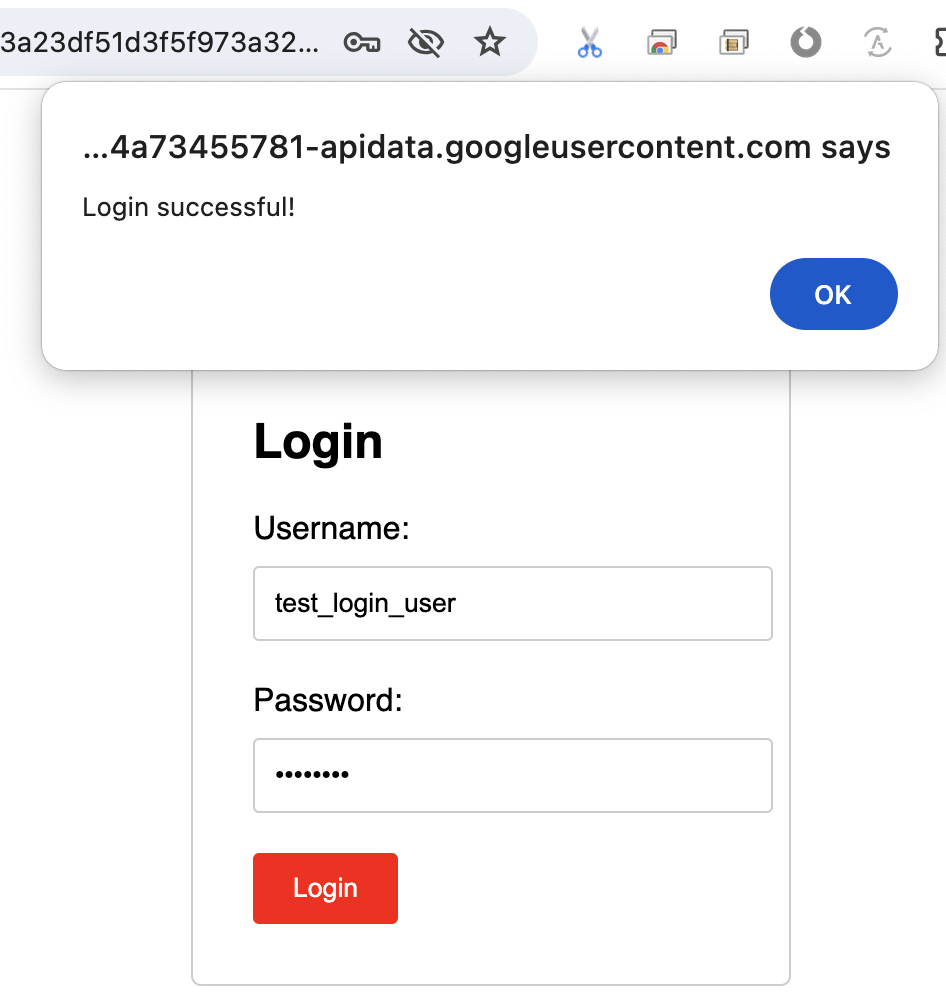

# 🧹 Cleaning up

Clean up resources created in this notebook.

Remove the extensions instances created in this notebook by running the cell below:  

In [ ]:
extension_code_interpreter.delete()

INFO:google.cloud.aiplatform.base:Deleting Extension : projects/certain-haiku-391918/locations/us-central1/extensions/2441443579244052480
INFO:google.cloud.aiplatform.base:Delete Extension  backing LRO: projects/656421903914/locations/us-central1/operations/7221688063104122880
INFO:google.cloud.aiplatform.base:Extension deleted. . Resource name: projects/certain-haiku-391918/locations/us-central1/extensions/2441443579244052480


You can run the next cell to get a list of all other remaining Vertex AI Extension Instances in your environment:

In [ ]:
extensions.Extension.list()

Optionally, you can uncomment the following code block to delete all active extensions in your project, by using the IDs above to clean up:

In [ ]:
#clean_ids = []

#for element in extensions.Extension.list():
    #clean_ids.append(str(element).split("extensions/")[1])

#for id in clean_ids:
   #extension = extensions.Extension(id)
   #extension.delete()

Uncomment below to delete your GCS Bucket by first deleting all files in it, then deleting the bucket itself:

❗❗❗ Only run the below cells if you created a new bucket just for this notebook ❗❗❗

In [ ]:
# Delete contents of the bucket and the bucket
#! gsutil -m rm -r gs://$GCS_BUCKET

Delete your Google Cloud CLI ADC Configuration, if you no longer need it, by running:

`$ gcloud config configurations delete CONFIG_NAME`


❗❗❗ Don't forget to delete any other created assets if you don't need them.